# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

<span style="color:pink">.Ans: There is no definite number for it. In fact, there is a non-zero chance that somebody can open 100 loot boxes and get 100 elixir or no elixir, although the probability of that happening is very very small. Most people will get around 15.</span>

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

<span style="color:pink">.Ans: There is no definite number for it. In fact, there is a non-zero chance that somebody can open 1,000,000 loot boxes and still not get any elixir, although the probability of that happening is very very small.</span>

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

<span style="color:pink">X is a random integer in the range of 0 to 100. The range is made up of a finite number of values.</span>

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

<span style="color:pink">Binomial because there are two parameters, the 15% probability of success (getting an elixir) and n=100 (the number of loot box to open).</span>

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportion_confint
import math
plt.style.use('seaborn-pastel')

In [8]:
#mean and variance 
stats.binom.stats(100, 0.15)

(array(15.), array(12.75))

In [13]:
#range, no of trials, prob of success
more_than_20elixirs = 0
for r in range(21,101):
    more_than_20elixirs += stats.binom.pmf(r, 100, 0.15)
print(f"The chance that a user can get more than 20 elixirs from 100 loot boxes is {round(more_than_20elixirs*100,2)}%")

The chance that a user can get more than 20 elixirs from 100 loot boxes is 6.63%


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [33]:
#This is the probability of getting 20 or less elixirs from opening 100 boxes
stats.binom.cdf(20,100,0.15)

#To get probability of getting more than 20:
print(f"The chance of getting more than 20 elixirs, calculated by cdf is {round((1-stats.binom.cdf(20,100,0.15))*100,2)}%")

The chance of getting more than 20 elixirs, calculated by cdf is 6.63%


#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

<span style="color:pink">6.63%</span>

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

<span style="color:pink">Poisson. For Bernoulli distribution, there is only 1 trial, and for binomial there are nth number of trials. There is no fixed number of trials here.</span>

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [60]:
# Show your work; leave your answer in a comment.
#Loot box is $1
users = math.ceil(500000/1/2.7)

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [76]:
#low value users buys <=4 loot boxes and high value users buy >=5 loot boxes. 
lootbox_poisson = stats.poisson(2.7)
low_value_users = 0
low_value_revenue = 0
for x in range(0,5):
    low_value_users += round(186_000 * stats.poisson(mu = 2.7).pmf(x))
    low_value_revenue += round(186_000 * stats.poisson(mu = 2.7).pmf(x)) * x * 1 #no of users * number of loot box * $1
    print(f"There are {round(186_000 * stats.poisson(mu = 2.7).pmf(x))} users expected to purchase {x} loot boxes.")

high_value_users = users - low_value_users
print(f'There are {high_value_users} high value users')
print(f'We will earn ${low_value_revenue} from low value users and ${500000-low_value_revenue} from high value users')

There are 12500 users expected to purchase 0 loot boxes.
There are 33751 users expected to purchase 1 loot boxes.
There are 45563 users expected to purchase 2 loot boxes.
There are 41007 users expected to purchase 3 loot boxes.
There are 27680 users expected to purchase 4 loot boxes.
There are 24685 high value users
We will earn $358618 from low value users and $141382 from high value users


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [116]:
elixir = [1] * 15 + [0] * 85
first_elixir = []

for x in range(1,100001):
    counter = 1
    while True:
        if np.random.choice(elixir, size=1, replace=True) == 1:
            first_elixir.append(counter)
            break
        else:
            counter += 1

In [125]:
first_elixir_df = pd.Series(first_elixir)

Text(0.5, 1.0, 'Histogram for No. of boxes for first elixir')

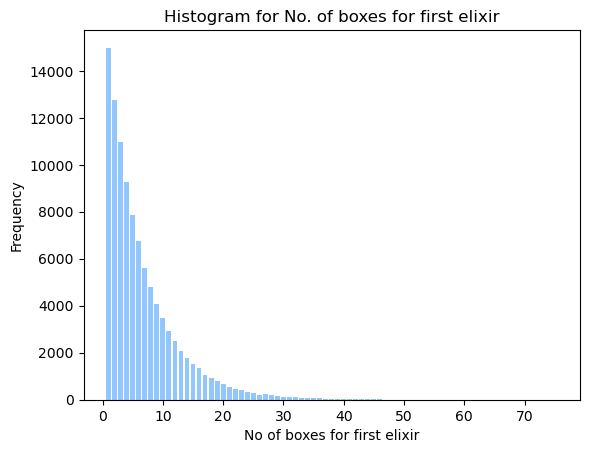

In [136]:
plt.bar(first_elixir_df.value_counts().index, first_elixir_df.value_counts())
plt.xlabel('No of boxes for first elixir')
plt.ylabel('Frequency')
plt.title('Histogram for No. of boxes for first elixir')

In [143]:
print(f"The 5th percentile is {np.percentile(first_elixir, 5)} tries. \n The 25th percentile is {np.percentile(first_elixir, 25)} tries. \n The 50th percentile is {np.percentile(first_elixir, 50)} tries. \n The 75th percentile is {np.percentile(first_elixir, 75)} tries. \n The 95th percentile is {np.percentile(first_elixir, 95)} tries.")

The 5th percentile is 1.0 tries. 
 The 25th percentile is 2.0 tries. 
 The 50th percentile is 5.0 tries. 
 The 75th percentile is 9.0 tries. 
 The 95th percentile is 19.0 tries.


**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

<span style="color:pink">Python has the following built-in datatypes.<br>
Text Type:	str<br>
Numeric Types: int, float, complex<br>
Sequence Types: list, tuple, range<br>
Mapping Type: dict<br>
Set Types: set, frozenset<br>
Boolean Type: bool<br>
Binary Types: bytes, bytearray, memoryview<br>
None Type: NoneType<br><br>
The best way is probably a list or a dictionary.</span>

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

<span style="color:pink">Look at the average number of version 2 loot boxes purchased per player compared to version 1. <br>
Look at whether the proportion of players that are spending money is larger or smaller with version 2 or version 1 loot box. (i.e. When version 1 is on sales, 30% of the players purchased at least 1 loot box. But when version 2 is on sales, 40% of the players purchased at least 1 loot box. Means version 2 attracts more players to spend money on the game.)<br>
Look at average play time per player since you can earn loot box through game time - Players that invested more time in a game are more willing to spend money on it too.</span>